# 1. 기본데이터프레임

In [75]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('../산업재해/finance_address_indurstry.csv')
df1 = df[['사업자등록번호', '결산년월', '업종대분류', '시도', '시군구', '휴폐업구분']]
df1['결산년월'] = df1['결산년월'].astype('str')
df1['년도'] = df1['결산년월'].apply(lambda x: x[:4])
df1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3412\441905695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['결산년월'] = df1['결산년월'].astype('str')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3412\441905695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['년도'] = df1['결산년월'].apply(lambda x: x[:4])


,사업자등록번호,결산년월,업종대분류,시도,시군구,휴폐업구분,년도
0,1018100340,20191231,부동산업,서울특별시,종로구,NaN,2019
1,1018100340,20201231,부동산업,서울특별시,종로구,NaN,2020
2,1018100340,20211231,부동산업,서울특별시,종로구,NaN,2021
3,1018100772,20191231,숙박 및 음식점업,서울특별시,종로구,NaN,2019
4,1018100772,20201231,숙박 및 음식점업,서울특별시,종로구,NaN,2020
...,...,...,...,...,...,...,...
77345,8998800427,20201231,제조업,충청남도,천안시,NaN,2020
77346,8998800427,20211231,제조업,충청남도,천안시,NaN,2021
77347,8998800785,20191231,부동산업,서울특별시,중구,NaN,2019
77348,8998800785,20201231,부동산업,서울특별시,중구,NaN,2020


In [77]:
sido_list = list(df.시도.unique())
industry_list = list(df.업종대분류.unique())

# 2. 전기요금 데이터프레임

In [78]:
electricity_bill_2019_1 = pd.read_excel('./산업분류별 전력사용량_19_상.xls', header=3)
electricity_bill_2019_2 = pd.read_excel('./산업분류별 전력사용량_19_하.xls', header=3)
electricity_bill_2020_1 = pd.read_excel('./산업분류별 전력사용량_20_상.xls', header=3)
electricity_bill_2020_2 = pd.read_excel('./산업분류별 전력사용량_20_하.xls', header=3)
electricity_bill_2021_1 = pd.read_excel('./산업분류별 전력사용량_21_상.xls', header=3)
electricity_bill_2021_2 = pd.read_excel('./산업분류별 전력사용량_21_하.xls', header=3)
electricity_bill_2019_1.계약구분.unique()

array(['가구내고용활동및달리분류되지않은자가소비생산활동', '건설업', '공공 행정, 국방 및 사회보장 행정', '광업',
       '교육 서비스업', '국제 및 외국기관', '금융 및 보험업', '농업, 임업 및 어업', '도매 및 소매업',
       '보건업 및 사회복지 서비스업', '부동산업', '사업시설 관리, 사업 지원 및 임대 서비스업',
       '수도, 하수 및 폐기물 처리, 원료 재생업', '숙박 및 음식점업', '예술, 스포츠 및 여가관련 서비스업',
       '운수 및 창고업', '전기, 가스, 증기 및 공기 조절 공급업', '전문, 과학 및 기술 서비스업', '정보통신업',
       '제조업', '협회 및 단체, 수리 및 기타 개인 서비스업', '합계', nan, '계약구분'], dtype=object)

In [79]:
df.업종대분류.unique()

array(['부동산업', '숙박 및 음식점업', '예술, 스포츠 및 여가관련 서비스업', '전문, 과학 및 기술 서비스업',
       '도매 및 소매업', '제조업', '정보통신업', '교육 서비스업', '운수 및 창고업', '건설업',
       '사업시설 관리, 사업 지원 및 임대 서비스업', '금융 및 보험업', '전기, 가스, 증기 및 공기 조절 공급업',
       '협회 및 단체, 수리 및 기타 개인 서비스업', '수도, 하수 및 폐기물 처리, 원료 재생업',
       '보건업 및 사회복지 서비스업', '농업, 임업 및 어업', '공공 행정, 국방 및 사회보장 행정'],
      dtype=object)

## 2.1. 지역-산업-전기요금으로 딕셔너리 만들기

In [80]:
# 2019년 상하반기 지역-산업-전기요금 딕셔너리
electricity_bill_2019_1_dic = {}
for sido in sido_list:
    temp = dict(zip(electricity_bill_2019_1[electricity_bill_2019_1.시구 == sido]['계약구분'],
                 electricity_bill_2019_1[electricity_bill_2019_1.시구 == sido]['평균판매단가(원/kWh)']))
    electricity_bill_2019_1_dic[sido] = temp

electricity_bill_2019_2_dic = {}
for sido in sido_list:
    temp = dict(zip(electricity_bill_2019_2[electricity_bill_2019_2.시구 == sido]['계약구분'],
                 electricity_bill_2019_2[electricity_bill_2019_2.시구 == sido]['평균판매단가(원/kWh)']))
    electricity_bill_2019_2_dic[sido] = temp


# 2019년 상하반기 평균 지역-산업-전기요금
electricity_bill_2019_dic = electricity_bill_2019_1_dic.copy()
for sido in sido_list:
    for industry in industry_list:
        a = float(electricity_bill_2019_1_dic[sido][industry])
        b = float(electricity_bill_2019_2_dic[sido][industry])
        temp = round((a + b)/2, 1)
        electricity_bill_2019_dic[sido][industry] = temp

electricity_bill_2019_dic

{'서울특별시': {'가구내고용활동및달리분류되지않은자가소비생산활동': '124.3 ',
  '건설업': 126.3,
  '공공 행정, 국방 및 사회보장 행정': 137.4,
  '광업': '144.8 ',
  '교육 서비스업': 103.5,
  '국제 및 외국기관': '111 ',
  '금융 및 보험업': 125.5,
  '농업, 임업 및 어업': 66.2,
  '도매 및 소매업': 126.9,
  '보건업 및 사회복지 서비스업': 117.6,
  '부동산업': 134.7,
  '사업시설 관리, 사업 지원 및 임대 서비스업': 136.8,
  '수도, 하수 및 폐기물 처리, 원료 재생업': 111.7,
  '숙박 및 음식점업': 124.3,
  '예술, 스포츠 및 여가관련 서비스업': 128.5,
  '운수 및 창고업': 118.1,
  '전기, 가스, 증기 및 공기 조절 공급업': 123.8,
  '전문, 과학 및 기술 서비스업': 124.1,
  '정보통신업': 107.7,
  '제조업': 124.3,
  '협회 및 단체, 수리 및 기타 개인 서비스업': 143.1,
  '합계': '123.1 '},
 '경기도': {'가구내고용활동및달리분류되지않은자가소비생산활동': '139.3 ',
  '건설업': 137.0,
  '공공 행정, 국방 및 사회보장 행정': 127.2,
  '광업': '127.3 ',
  '교육 서비스업': 108.6,
  '국제 및 외국기관': '118.2 ',
  '금융 및 보험업': 130.6,
  '농업, 임업 및 어업': 49.2,
  '도매 및 소매업': 126.6,
  '보건업 및 사회복지 서비스업': 116.2,
  '부동산업': 134.6,
  '사업시설 관리, 사업 지원 및 임대 서비스업': 135.6,
  '수도, 하수 및 폐기물 처리, 원료 재생업': 109.5,
  '숙박 및 음식점업': 127.2,
  '예술, 스포츠 및 여가관련 서비스업': 130.5,
  '운수 및 창고업': 121.2,
  '전기, 가스, 증기 

In [81]:
# 2020년 상하반기 지역-산업-전기요금 딕셔너리
electricity_bill_2020_1_dic = {}
for sido in sido_list:
    temp = dict(zip(electricity_bill_2020_1[electricity_bill_2020_1.시구 == sido]['계약구분'],
                 electricity_bill_2020_1[electricity_bill_2020_1.시구 == sido]['평균판매단가(원/kWh)']))
    electricity_bill_2020_1_dic[sido] = temp

electricity_bill_2020_2_dic = {}
for sido in sido_list:
    temp = dict(zip(electricity_bill_2020_2[electricity_bill_2020_2.시구 == sido]['계약구분'],
                 electricity_bill_2020_2[electricity_bill_2020_2.시구 == sido]['평균판매단가(원/kWh)']))
    electricity_bill_2020_2_dic[sido] = temp


# 2020년 상하반기 평균 지역-산업-전기요금
electricity_bill_2020_dic = electricity_bill_2020_1_dic.copy()
for sido in sido_list:
    for industry in industry_list:
        a = float(electricity_bill_2020_1_dic[sido][industry])
        b = float(electricity_bill_2020_2_dic[sido][industry])
        temp = round((a + b)/2, 1)
        electricity_bill_2020_dic[sido][industry] = temp

electricity_bill_2020_dic

{'서울특별시': {'가구내고용활동및달리분류되지않은자가소비생산활동': '125.1 ',
  '건설업': 128.5,
  '공공 행정, 국방 및 사회보장 행정': 139.2,
  '광업': '138.8 ',
  '교육 서비스업': 104.7,
  '국제 및 외국기관': '118.8 ',
  '금융 및 보험업': 126.7,
  '농업, 임업 및 어업': 67.3,
  '도매 및 소매업': 128.3,
  '보건업 및 사회복지 서비스업': 118.2,
  '부동산업': 136.6,
  '사업시설 관리, 사업 지원 및 임대 서비스업': 138.6,
  '수도, 하수 및 폐기물 처리, 원료 재생업': 110.5,
  '숙박 및 음식점업': 128.4,
  '예술, 스포츠 및 여가관련 서비스업': 135.1,
  '운수 및 창고업': 118.3,
  '전기, 가스, 증기 및 공기 조절 공급업': 130.8,
  '전문, 과학 및 기술 서비스업': 125.1,
  '정보통신업': 107.3,
  '제조업': 126.5,
  '협회 및 단체, 수리 및 기타 개인 서비스업': 148.4,
  '합계': '124.8 '},
 '경기도': {'가구내고용활동및달리분류되지않은자가소비생산활동': '149.2 ',
  '건설업': 139.3,
  '공공 행정, 국방 및 사회보장 행정': 127.7,
  '광업': '130.6 ',
  '교육 서비스업': 109.5,
  '국제 및 외국기관': '107.7 ',
  '금융 및 보험업': 133.4,
  '농업, 임업 및 어업': 49.8,
  '도매 및 소매업': 127.3,
  '보건업 및 사회복지 서비스업': 115.8,
  '부동산업': 136.1,
  '사업시설 관리, 사업 지원 및 임대 서비스업': 135.8,
  '수도, 하수 및 폐기물 처리, 원료 재생업': 109.2,
  '숙박 및 음식점업': 129.0,
  '예술, 스포츠 및 여가관련 서비스업': 135.7,
  '운수 및 창고업': 120.3,
  '전기, 가스, 증

In [82]:
# 2021년 상하반기 지역-산업-전기요금 딕셔너리
electricity_bill_2021_1_dic = {}
for sido in sido_list:
    temp = dict(zip(electricity_bill_2021_1[electricity_bill_2021_1.시구 == sido]['계약구분'],
                 electricity_bill_2021_1[electricity_bill_2021_1.시구 == sido]['평균판매단가(원/kWh)']))
    electricity_bill_2021_1_dic[sido] = temp

electricity_bill_2021_2_dic = {}
for sido in sido_list:
    temp = dict(zip(electricity_bill_2021_2[electricity_bill_2021_2.시구 == sido]['계약구분'],
                 electricity_bill_2021_2[electricity_bill_2021_2.시구 == sido]['평균판매단가(원/kWh)']))
    electricity_bill_2021_2_dic[sido] = temp


# 2021년 상하반기 평균 지역-산업-전기요금
electricity_bill_2021_dic = electricity_bill_2021_1_dic.copy()
for sido in sido_list:
    for industry in industry_list:
        a = float(electricity_bill_2021_1_dic[sido][industry])
        b = float(electricity_bill_2021_2_dic[sido][industry])
        temp = round((a + b)/2, 1)
        electricity_bill_2021_dic[sido][industry] = temp

electricity_bill_2021_dic

{'서울특별시': {'가구내고용활동및달리분류되지않은자가소비생산활동': '117.1 ',
  '건설업': 132.3,
  '공공 행정, 국방 및 사회보장 행정': 146.0,
  '광업': '138.8 ',
  '교육 서비스업': 100.5,
  '국제 및 외국기관': '115.7 ',
  '금융 및 보험업': 130.7,
  '농업, 임업 및 어업': 64.8,
  '도매 및 소매업': 123.8,
  '보건업 및 사회복지 서비스업': 113.3,
  '부동산업': 138.7,
  '사업시설 관리, 사업 지원 및 임대 서비스업': 140.2,
  '수도, 하수 및 폐기물 처리, 원료 재생업': 110.4,
  '숙박 및 음식점업': 130.2,
  '예술, 스포츠 및 여가관련 서비스업': 133.5,
  '운수 및 창고업': 119.8,
  '전기, 가스, 증기 및 공기 조절 공급업': 122.6,
  '전문, 과학 및 기술 서비스업': 123.6,
  '정보통신업': 107.9,
  '제조업': 125.3,
  '협회 및 단체, 수리 및 기타 개인 서비스업': 151.3,
  '합계': '121.8 '},
 '경기도': {'가구내고용활동및달리분류되지않은자가소비생산활동': '141.9 ',
  '건설업': 144.3,
  '공공 행정, 국방 및 사회보장 행정': 131.9,
  '광업': '128 ',
  '교육 서비스업': 107.2,
  '국제 및 외국기관': '106.4 ',
  '금융 및 보험업': 137.3,
  '농업, 임업 및 어업': 47.3,
  '도매 및 소매업': 122.7,
  '보건업 및 사회복지 서비스업': 112.0,
  '부동산업': 139.0,
  '사업시설 관리, 사업 지원 및 임대 서비스업': 136.2,
  '수도, 하수 및 폐기물 처리, 원료 재생업': 109.3,
  '숙박 및 음식점업': 132.2,
  '예술, 스포츠 및 여가관련 서비스업': 134.6,
  '운수 및 창고업': 122.5,
  '전기, 가스, 증기 

In [83]:
electricity_bill = dict(zip(['2019', '2020', '2021'], [electricity_bill_2019_dic, electricity_bill_2020_dic, electricity_bill_2021_dic]))
electricity_bill

{'2019': {'서울특별시': {'가구내고용활동및달리분류되지않은자가소비생산활동': '124.3 ',
   '건설업': 126.3,
   '공공 행정, 국방 및 사회보장 행정': 137.4,
   '광업': '144.8 ',
   '교육 서비스업': 103.5,
   '국제 및 외국기관': '111 ',
   '금융 및 보험업': 125.5,
   '농업, 임업 및 어업': 66.2,
   '도매 및 소매업': 126.9,
   '보건업 및 사회복지 서비스업': 117.6,
   '부동산업': 134.7,
   '사업시설 관리, 사업 지원 및 임대 서비스업': 136.8,
   '수도, 하수 및 폐기물 처리, 원료 재생업': 111.7,
   '숙박 및 음식점업': 124.3,
   '예술, 스포츠 및 여가관련 서비스업': 128.5,
   '운수 및 창고업': 118.1,
   '전기, 가스, 증기 및 공기 조절 공급업': 123.8,
   '전문, 과학 및 기술 서비스업': 124.1,
   '정보통신업': 107.7,
   '제조업': 124.3,
   '협회 및 단체, 수리 및 기타 개인 서비스업': 143.1,
   '합계': '123.1 '},
  '경기도': {'가구내고용활동및달리분류되지않은자가소비생산활동': '139.3 ',
   '건설업': 137.0,
   '공공 행정, 국방 및 사회보장 행정': 127.2,
   '광업': '127.3 ',
   '교육 서비스업': 108.6,
   '국제 및 외국기관': '118.2 ',
   '금융 및 보험업': 130.6,
   '농업, 임업 및 어업': 49.2,
   '도매 및 소매업': 126.6,
   '보건업 및 사회복지 서비스업': 116.2,
   '부동산업': 134.6,
   '사업시설 관리, 사업 지원 및 임대 서비스업': 135.6,
   '수도, 하수 및 폐기물 처리, 원료 재생업': 109.5,
   '숙박 및 음식점업': 127.2,
   '예술, 스포츠 및 여가관련 서비스업

# 3. 전기요금 컬럼생성

In [84]:
def check(x):
    return electricity_bill[x.년도][x.시도][x.업종대분류]

df1['전기요금'] = df1.apply(check, axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3412\250811991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['전기요금'] = df1.apply(check, axis=1)


In [85]:
def check(x):
    if x == '폐업' or x == '휴업':
        return 1
    else:
        return 0

df1['휴폐업구분'] = df['휴폐업구분'].apply(check)
df1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3412\182100997.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['휴폐업구분'] = df['휴폐업구분'].apply(check)


,사업자등록번호,결산년월,업종대분류,시도,시군구,휴폐업구분,년도,전기요금
0,1018100340,20191231,부동산업,서울특별시,종로구,0,2019,134.7
1,1018100340,20201231,부동산업,서울특별시,종로구,0,2020,136.6
2,1018100340,20211231,부동산업,서울특별시,종로구,0,2021,138.7
3,1018100772,20191231,숙박 및 음식점업,서울특별시,종로구,0,2019,124.3
4,1018100772,20201231,숙박 및 음식점업,서울특별시,종로구,0,2020,128.4
...,...,...,...,...,...,...,...,...
77345,8998800427,20201231,제조업,충청남도,천안시,0,2020,102.9
77346,8998800427,20211231,제조업,충청남도,천안시,0,2021,106.0
77347,8998800785,20191231,부동산업,서울특별시,중구,0,2019,134.7
77348,8998800785,20201231,부동산업,서울특별시,중구,0,2020,136.6


In [86]:
df1['휴폐업구분'].unique()

array([0, 1], dtype=int64)

# 4. 전기요금과 휴폐업간 관계파악

In [87]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 폰트 및 스타일 설정
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')
%matplotlib inline

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

## 4.1. 년도별 전기요금과 휴폐업간 관계

<AxesSubplot:xlabel='년도', ylabel='전기요금'>

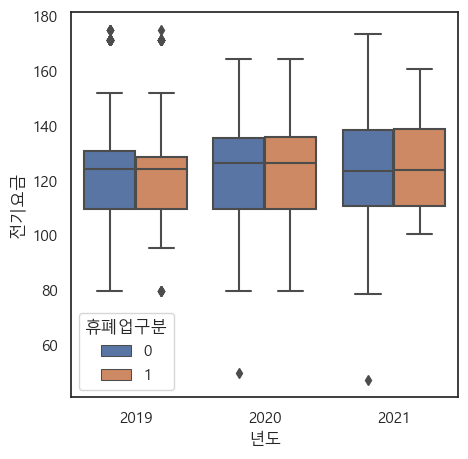

In [88]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='년도', y='전기요금', hue='휴폐업구분', data=df1)

## 4.2. 업종별 전기요금과 휴폐업간 관계

<AxesSubplot:xlabel='업종대분류', ylabel='전기요금'>

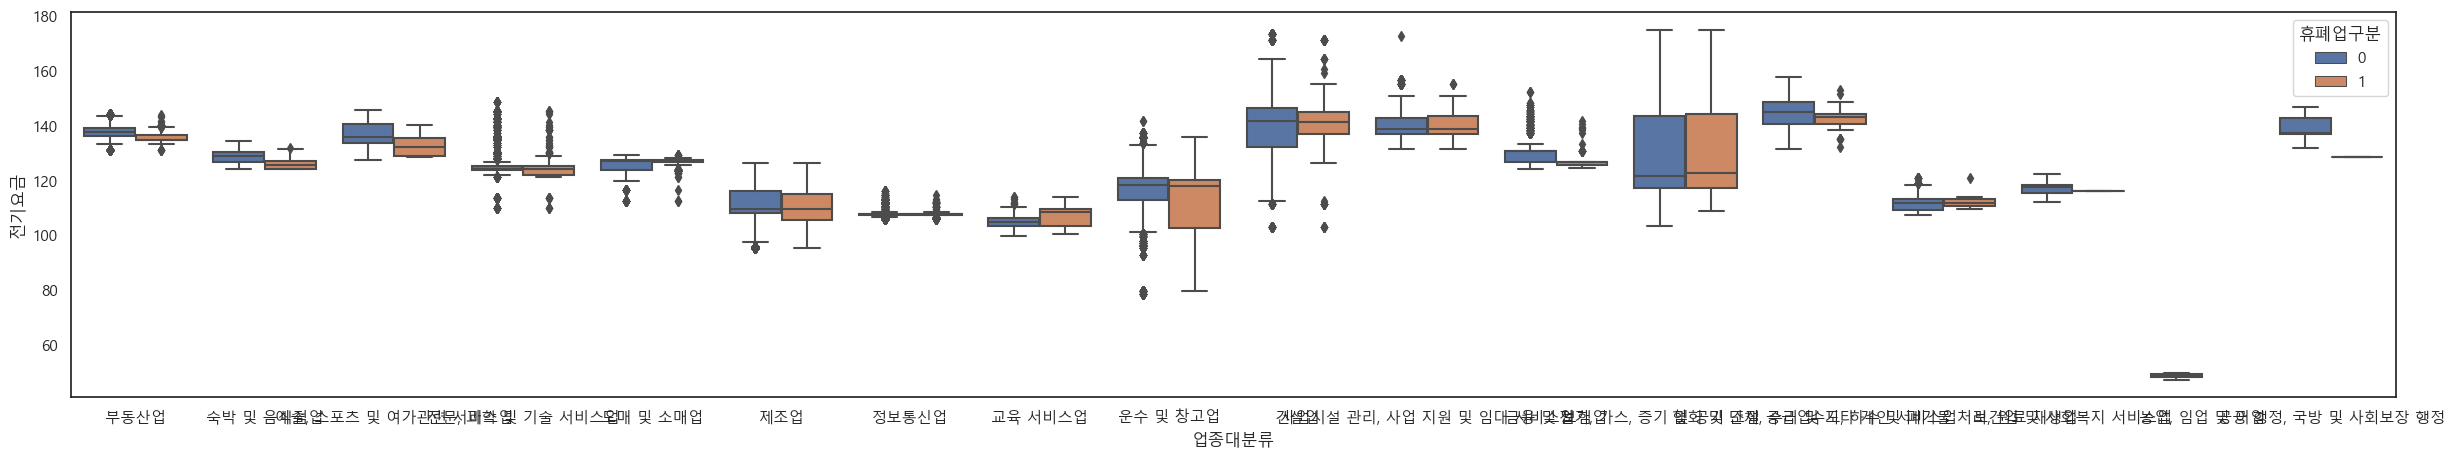

In [90]:
plt.figure(figsize=(30, 5))
sns.boxplot(x='업종대분류', y='전기요금', hue='휴폐업구분', data=df1)


## 4.3. 시도별 전기요금과 휴폐업간 관계

<AxesSubplot:xlabel='시도', ylabel='전기요금'>

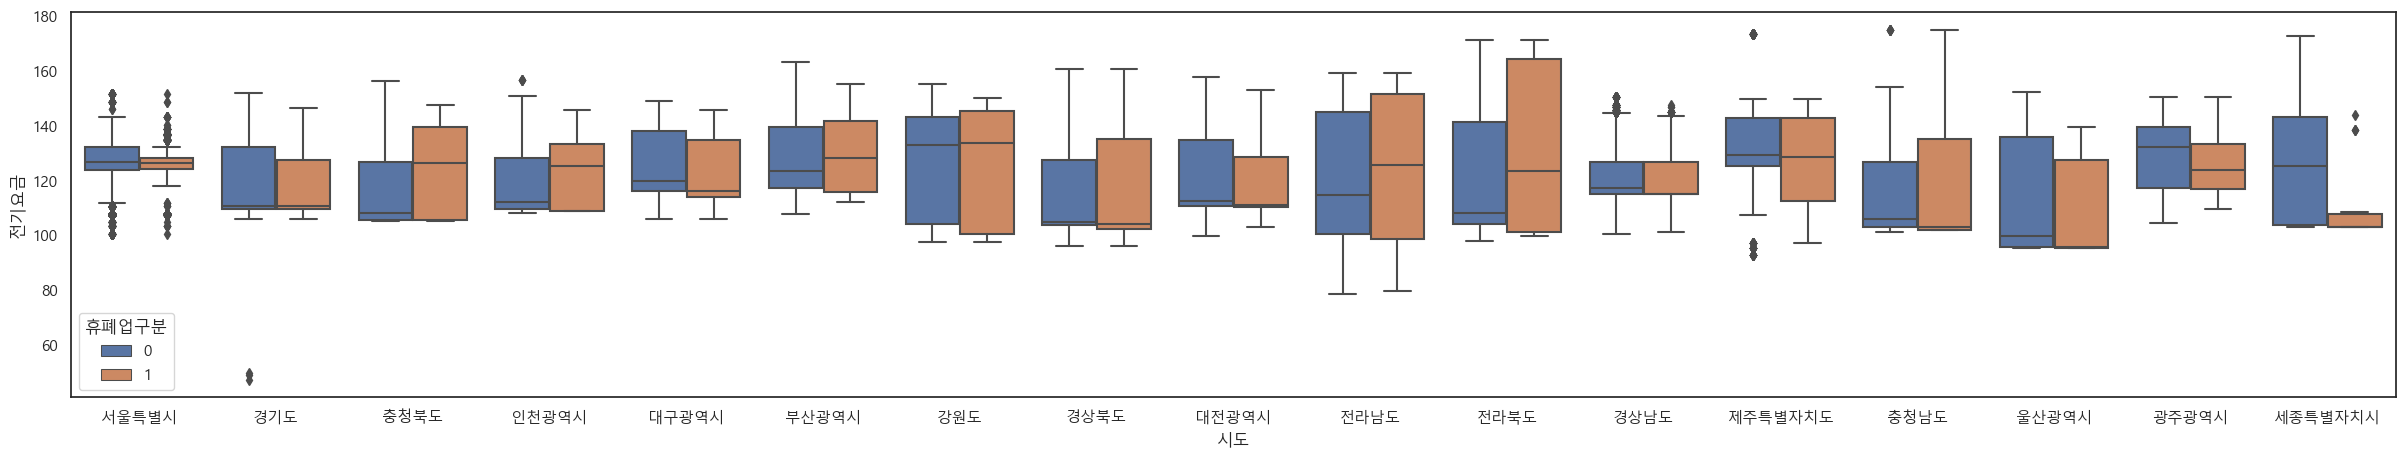

In [92]:
plt.figure(figsize=(30, 5))
sns.boxplot(x='시도', y='전기요금', hue='휴폐업구분', data=df1)

## 4.4. 연도-지역-업종별 전기요금과 휴폐업구분간 관계 

In [93]:
for year in ['2019', '2020', '2021']:
    for sido in sido_list:
        for industry in industry_list:
            temp = df1[(df1.년도 == year) & (df1.시도 == sido) & (df1.업종대분류 == industry) & (df1.휴폐업구분 == 1)]
            result = len(temp)
            print(f'{year}년 {sido}의 {industry}산업에서 발생한 휴폐업 수는 [{result}], 전기요금은 [{electricity_bill[year][sido][industry]}]  입니다.')

2019년 서울특별시의 부동산업산업에서 발생한 휴폐업 수는 [108], 전기요금은 [134.7]  입니다.
2019년 서울특별시의 숙박 및 음식점업산업에서 발생한 휴폐업 수는 [31], 전기요금은 [124.3]  입니다.
2019년 서울특별시의 예술, 스포츠 및 여가관련 서비스업산업에서 발생한 휴폐업 수는 [7], 전기요금은 [128.5]  입니다.
2019년 서울특별시의 전문, 과학 및 기술 서비스업산업에서 발생한 휴폐업 수는 [85], 전기요금은 [124.1]  입니다.
2019년 서울특별시의 도매 및 소매업산업에서 발생한 휴폐업 수는 [173], 전기요금은 [126.9]  입니다.
2019년 서울특별시의 제조업산업에서 발생한 휴폐업 수는 [131], 전기요금은 [124.3]  입니다.
2019년 서울특별시의 정보통신업산업에서 발생한 휴폐업 수는 [148], 전기요금은 [107.7]  입니다.
2019년 서울특별시의 교육 서비스업산업에서 발생한 휴폐업 수는 [5], 전기요금은 [103.5]  입니다.
2019년 서울특별시의 운수 및 창고업산업에서 발생한 휴폐업 수는 [14], 전기요금은 [118.1]  입니다.
2019년 서울특별시의 건설업산업에서 발생한 휴폐업 수는 [64], 전기요금은 [126.3]  입니다.
2019년 서울특별시의 사업시설 관리, 사업 지원 및 임대 서비스업산업에서 발생한 휴폐업 수는 [40], 전기요금은 [136.8]  입니다.
2019년 서울특별시의 금융 및 보험업산업에서 발생한 휴폐업 수는 [49], 전기요금은 [125.5]  입니다.
2019년 서울특별시의 전기, 가스, 증기 및 공기 조절 공급업산업에서 발생한 휴폐업 수는 [0], 전기요금은 [123.8]  입니다.
2019년 서울특별시의 협회 및 단체, 수리 및 기타 개인 서비스업산업에서 발생한 휴폐업 수는 [10], 전기요금은 [143.1]  입니다.
2019년 서울특별시의 수도, 하수 및 폐기물 처리, 원료 재생업산업에서 발생한 휴폐업 수는 [3], 전기요금은 [111.7

In [94]:
df_col1 = []
df_col2 = []
df_col3 = []
df_col4 = []
df_col5 = []

for year in ['2019', '2020', '2021']:
    for sido in sido_list:
        for industry in industry_list:
            temp = df1[(df1.년도 == year) & (df1.시도 == sido) & (df1.업종대분류 == industry) & (df1.휴폐업구분 == 1)]
            result = len(temp)
            df_col1.append(year)
            df_col2.append(sido)
            df_col3.append(industry)
            df_col4.append(result)
            df_col5.append(electricity_bill[year][sido][industry])


In [95]:
target_num = pd.DataFrame({'연도':df_col1, '시도':df_col2, '업종대분류':df_col3, '휴폐업개수':df_col4, '전기요금':df_col5})
target_num

,연도,시도,업종대분류,휴폐업개수,전기요금
0,2019,서울특별시,부동산업,108,134.7
1,2019,서울특별시,숙박 및 음식점업,31,124.3
2,2019,서울특별시,"예술, 스포츠 및 여가관련 서비스업",7,128.5
3,2019,서울특별시,"전문, 과학 및 기술 서비스업",85,124.1
4,2019,서울특별시,도매 및 소매업,173,126.9
...,...,...,...,...,...
913,2021,세종특별자치시,"협회 및 단체, 수리 및 기타 개인 서비스업",0,145.4
914,2021,세종특별자치시,"수도, 하수 및 폐기물 처리, 원료 재생업",0,116.5
915,2021,세종특별자치시,보건업 및 사회복지 서비스업,0,114.0
916,2021,세종특별자치시,"농업, 임업 및 어업",0,46.5


In [96]:
target_num[target_num.휴폐업개수 >= 1]

,연도,시도,업종대분류,휴폐업개수,전기요금
0,2019,서울특별시,부동산업,108,134.7
1,2019,서울특별시,숙박 및 음식점업,31,124.3
2,2019,서울특별시,"예술, 스포츠 및 여가관련 서비스업",7,128.5
3,2019,서울특별시,"전문, 과학 및 기술 서비스업",85,124.1
4,2019,서울특별시,도매 및 소매업,173,126.9
...,...,...,...,...,...
819,2021,경상남도,건설업,1,141.8
851,2021,충청남도,제조업,1,106.0
855,2021,충청남도,건설업,1,148.0
887,2021,광주광역시,제조업,1,117.3


(5.0, 200.0)

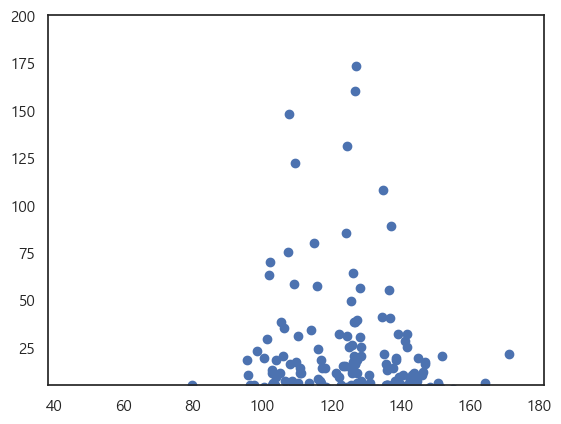

In [97]:
x = target_num.전기요금
y = target_num.휴폐업개수
plt.scatter(x, y)
plt.ylim(5, 200)

# 5. 전기요금 구간별 휴폐업분석
## 5.1. 정규화 X

In [98]:
df1

,사업자등록번호,결산년월,업종대분류,시도,시군구,휴폐업구분,년도,전기요금
0,1018100340,20191231,부동산업,서울특별시,종로구,0,2019,134.7
1,1018100340,20201231,부동산업,서울특별시,종로구,0,2020,136.6
2,1018100340,20211231,부동산업,서울특별시,종로구,0,2021,138.7
3,1018100772,20191231,숙박 및 음식점업,서울특별시,종로구,0,2019,124.3
4,1018100772,20201231,숙박 및 음식점업,서울특별시,종로구,0,2020,128.4
...,...,...,...,...,...,...,...,...
77345,8998800427,20201231,제조업,충청남도,천안시,0,2020,102.9
77346,8998800427,20211231,제조업,충청남도,천안시,0,2021,106.0
77347,8998800785,20191231,부동산업,서울특별시,중구,0,2019,134.7
77348,8998800785,20201231,부동산업,서울특별시,중구,0,2020,136.6


In [99]:
print(f'전기요금 100원 이하인 기업 수 : {len(df1[df1.전기요금 <= 100])}')
print(f'전기요금 101원 ~ 140원인 기업 수 : {len(df1[(df1.전기요금 > 100) & (df1.전기요금 <= 140)])}')
print(f'전기요금 140원 이상인 기업 수 : {len(df1[df1.전기요금 > 140])}')

전기요금 100원 이하인 기업 수 : 1349
전기요금 101원 ~ 140원인 기업 수 : 68599
전기요금 140원 이상인 기업 수 : 7402


In [100]:
print(f'전기요금 100원 이하인 기업 중 폐업한 기업 수 : {len(df1[(df1.전기요금 <= 100) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금 101원 ~ 140원인 기업 중 폐업한 기업 수 : {len(df1[(df1.전기요금 > 100) & (df1.전기요금 <= 140) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금 140원 이상인 기업 중 폐업한 기업 수 : {len(df1[(df1.전기요금 > 140) & (df1.휴폐업구분 == 1)])}')

전기요금 100원 이하인 기업 중 폐업한 기업 수 : 72
전기요금 101원 ~ 140원인 기업 중 폐업한 기업 수 : 3513
전기요금 140원 이상인 기업 중 폐업한 기업 수 : 396


In [101]:
print(f'전기요금 100원 이하인 기업 중 폐업한 비율 : {len(df1[(df1.전기요금 <= 100) & (df1.휴폐업구분 == 1)]) / len(df1[df1.전기요금 <= 100])}')
print(f'전기요금 101원 ~ 140원인 기업 중 폐업한 비율 : {len(df1[(df1.전기요금 > 100) & (df1.전기요금 <= 140) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금 > 100) & (df1.전기요금 <= 140)])}')
print(f'전기요금 140원 이상인 기업 중 폐업한 비율 : {len(df1[(df1.전기요금 > 140) & (df1.휴폐업구분 == 1)]) / len(df1[df1.전기요금 > 140])}')

전기요금 100원 이하인 기업 중 폐업한 비율 : 0.05337286879169755
전기요금 101원 ~ 140원인 기업 중 폐업한 비율 : 0.05121065904750798
전기요금 140원 이상인 기업 중 폐업한 비율 : 0.05349905430964604


## 5.2. 정규화 O
- 전기요금은 매년 상승하기 때문에 단순 요금으로 비교하면 산업별 전기요금 차이가 반영되기 어려움
- 따라서 2019, 2020, 2021년 각각 산업별로 minmaxscale을 진행하여 분석해볼 것

### 5.2.1. 연도별 min_max

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [103]:
minmax_2019 = target_num[target_num.연도=='2019'].전기요금.to_numpy()
minmax_2019 = minmax_2019.reshape(-1, 1)
min_max_scaler = MinMaxScaler()
minmax_2019 = min_max_scaler.fit_transform(minmax_2019)

minmax_2020 = target_num[target_num.연도=='2020'].전기요금.to_numpy()
minmax_2020 = minmax_2020.reshape(-1, 1)
min_max_scaler = MinMaxScaler()
minmax_2020 = min_max_scaler.fit_transform(minmax_2020)

minmax_2021 = target_num[target_num.연도=='2021'].전기요금.to_numpy()
minmax_2021 = minmax_2021.reshape(-1, 1)
min_max_scaler = MinMaxScaler()
minmax_2021 = min_max_scaler.fit_transform(minmax_2021)

In [104]:
minmax_2019 = minmax_2019.reshape(1, -1)
minmax_2019 = minmax_2019.tolist()

minmax_2020 = minmax_2020.reshape(1, -1)
minmax_2020 = minmax_2020.tolist()

minmax_2021 = minmax_2021.reshape(1, -1)
minmax_2021 = minmax_2021.tolist()

temp = minmax_2019[0] + minmax_2020[0] + minmax_2021[0]
len(temp)

918

In [115]:
target_num['minmax'] = temp
target_num

,연도,시도,업종대분류,휴폐업개수,전기요금,minmax
0,2019,서울특별시,부동산업,108,134.7,0.686183
1,2019,서울특별시,숙박 및 음식점업,31,124.3,0.604996
2,2019,서울특별시,"예술, 스포츠 및 여가관련 서비스업",7,128.5,0.637783
3,2019,서울특별시,"전문, 과학 및 기술 서비스업",85,124.1,0.603435
4,2019,서울특별시,도매 및 소매업,173,126.9,0.625293
...,...,...,...,...,...,...
913,2021,세종특별자치시,"협회 및 단체, 수리 및 기타 개인 서비스업",0,145.4,0.781832
914,2021,세종특별자치시,"수도, 하수 및 폐기물 처리, 원료 재생업",0,116.5,0.557453
915,2021,세종특별자치시,보건업 및 사회복지 서비스업,0,114.0,0.538043
916,2021,세종특별자치시,"농업, 임업 및 어업",0,46.5,0.013975


(5.0, 200.0)

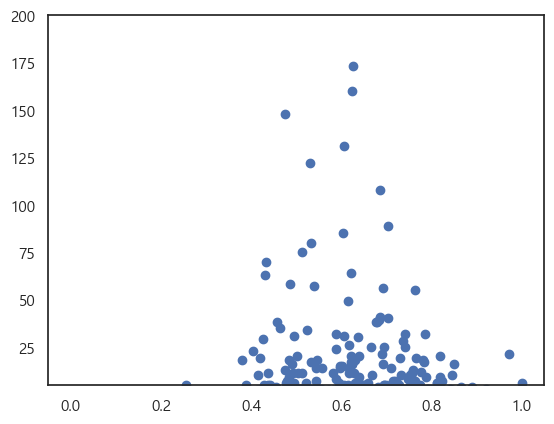

In [117]:
x = target_num.minmax
y = target_num.휴폐업개수
plt.scatter(x, y)
plt.ylim(5, 200)

### 5.2.2. 연도-지역-산업별 min_max

In [105]:
import copy

electricity_bill_minmax = copy.deepcopy(electricity_bill)

In [106]:
for year in ['2019', '2020', '2021']:
    for sido in sido_list:
        a = np.array(list(electricity_bill[year][sido].values()))
        a = a.reshape(-1, 1)

        min_max_scaler = MinMaxScaler()
        b = min_max_scaler.fit_transform(a)
        b = b.reshape(1, -1)[0].tolist()

        for i, key in enumerate(electricity_bill[year][sido].keys()):
            electricity_bill_minmax[year][sido][key] = b[i]

In [107]:
electricity_bill_minmax

{'2019': {'서울특별시': {'가구내고용활동및달리분류되지않은자가소비생산활동': 0.7391857506361321,
   '건설업': 0.7646310432569974,
   '공공 행정, 국방 및 사회보장 행정': 0.9058524173027989,
   '광업': 1.0,
   '교육 서비스업': 0.47455470737913474,
   '국제 및 외국기관': 0.5699745547073791,
   '금융 및 보험업': 0.7544529262086512,
   '농업, 임업 및 어업': 0.0,
   '도매 및 소매업': 0.772264631043257,
   '보건업 및 사회복지 서비스업': 0.6539440203562339,
   '부동산업': 0.8715012722646307,
   '사업시설 관리, 사업 지원 및 임대 서비스업': 0.8982188295165394,
   '수도, 하수 및 폐기물 처리, 원료 재생업': 0.5788804071246818,
   '숙박 및 음식점업': 0.7391857506361321,
   '예술, 스포츠 및 여가관련 서비스업': 0.7926208651399489,
   '운수 및 창고업': 0.6603053435114501,
   '전기, 가스, 증기 및 공기 조절 공급업': 0.7328244274809159,
   '전문, 과학 및 기술 서비스업': 0.7366412213740456,
   '정보통신업': 0.5279898218829515,
   '제조업': 0.7391857506361321,
   '협회 및 단체, 수리 및 기타 개인 서비스업': 0.9783715012722645,
   '합계': 0.723918575063613},
  '경기도': {'가구내고용활동및달리분류되지않은자가소비생산활동': 0.9857768052516414,
   '건설업': 0.9606126914660833,
   '공공 행정, 국방 및 사회보장 행정': 0.8533916849015319,
   '광업': 0.854485776

In [119]:
def check(x):
    return electricity_bill_minmax[x.년도][x.시도][x.업종대분류]

df1['전기요금_minmax'] = df1.apply(check, axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3412\2749785630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['전기요금_minmax'] = df1.apply(check, axis=1)


In [120]:
df1

,사업자등록번호,결산년월,업종대분류,시도,시군구,휴폐업구분,년도,전기요금,전기요금_minmax
0,1018100340,20191231,부동산업,서울특별시,종로구,0,2019,134.7,0.871501
1,1018100340,20201231,부동산업,서울특별시,종로구,0,2020,136.6,0.854501
2,1018100340,20211231,부동산업,서울특별시,종로구,0,2021,138.7,0.854335
3,1018100772,20191231,숙박 및 음식점업,서울특별시,종로구,0,2019,124.3,0.739186
4,1018100772,20201231,숙박 및 음식점업,서울특별시,종로구,0,2020,128.4,0.753391
...,...,...,...,...,...,...,...,...,...
77345,8998800427,20201231,제조업,충청남도,천안시,0,2020,102.9,0.542914
77346,8998800427,20211231,제조업,충청남도,천안시,0,2021,106.0,0.554117
77347,8998800785,20191231,부동산업,서울특별시,중구,0,2019,134.7,0.871501
77348,8998800785,20201231,부동산업,서울특별시,중구,0,2020,136.6,0.854501


In [113]:
def check(x):
    return electricity_bill_minmax[x.연도][x.시도][x.업종대분류]

target_num['전기요금_minmax'] = target_num.apply(check, axis=1)

In [114]:
target_num

,연도,시도,업종대분류,휴폐업개수,전기요금,전기요금_minmax
0,2019,서울특별시,부동산업,108,134.7,0.871501
1,2019,서울특별시,숙박 및 음식점업,31,124.3,0.739186
2,2019,서울특별시,"예술, 스포츠 및 여가관련 서비스업",7,128.5,0.792621
3,2019,서울특별시,"전문, 과학 및 기술 서비스업",85,124.1,0.736641
4,2019,서울특별시,도매 및 소매업,173,126.9,0.772265
...,...,...,...,...,...,...
913,2021,세종특별자치시,"협회 및 단체, 수리 및 기타 개인 서비스업",0,145.4,0.783056
914,2021,세종특별자치시,"수도, 하수 및 폐기물 처리, 원료 재생업",0,116.5,0.554236
915,2021,세종특별자치시,보건업 및 사회복지 서비스업,0,114.0,0.534442
916,2021,세종특별자치시,"농업, 임업 및 어업",0,46.5,0.000000


(10.0, 200.0)

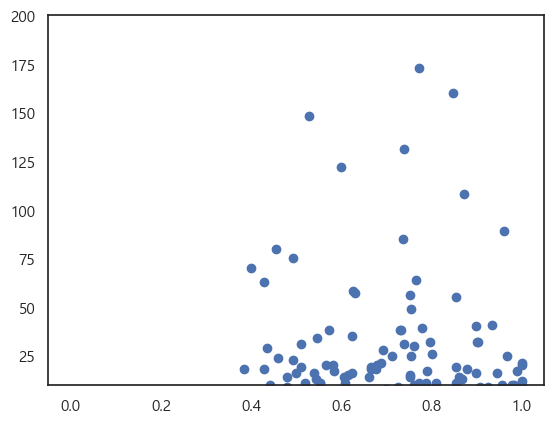

In [118]:
x = target_num.전기요금_minmax
y = target_num.휴폐업개수
plt.scatter(x, y)
plt.ylim(10, 200)

In [133]:
print(f'전기요금_minmax 0.4이하인 기업 수 : {len(df1[df1.전기요금_minmax <= 0.4])}')
print(f'전기요금_minmax 0.4 ~ 0.8인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.8)])}')
print(f'전기요금_minmax 0.8 이상인 기업 수 : {len(df1[df1.전기요금_minmax > 0.8])}')
print()

print(f'전기요금_minmax 0.4원 이하인 기업 중 폐업한 기업 수 : {len(df1[(df1.전기요금_minmax <= 0.4) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.4 ~ 0.8인 기업 중 폐업한 기업 수 : {len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.8) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.8 이상인 기업 중 폐업한 기업 수 : {len(df1[(df1.전기요금_minmax > 0.8) & (df1.휴폐업구분 == 1)])}')
print()

print(f'전기요금_minmax 0.4원 이하인 기업 중 폐업한 비율 : {len(df1[(df1.전기요금_minmax <= 0.4) & (df1.휴폐업구분 == 1)]) / len(df1[df1.전기요금_minmax <= 0.4]):.3f}')
print(f'전기요금_minmax 0.4 ~ 0.8인 기업 중 폐업한 비율 : {len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.8) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.8)]):.3f}')
print(f'전기요금_minmax 0.8 이상인 기업 중 폐업한 비율 : {len(df1[(df1.전기요금_minmax > 0.8) & (df1.휴폐업구분 == 1)]) / len(df1[df1.전기요금_minmax > 0.8]):.3f}')

전기요금_minmax 0.4이하인 기업 수 : 2372
전기요금_minmax 0.4 ~ 0.8인 기업 수 : 56486
전기요금_minmax 0.8 이상인 기업 수 : 18492

전기요금_minmax 0.4원 이하인 기업 중 폐업한 기업 수 : 106
전기요금_minmax 0.4 ~ 0.8인 기업 중 폐업한 기업 수 : 2819
전기요금_minmax 0.8 이상인 기업 중 폐업한 기업 수 : 1056

전기요금_minmax 0.4원 이하인 기업 중 폐업한 비율 : 0.045
전기요금_minmax 0.4 ~ 0.8인 기업 중 폐업한 비율 : 0.050
전기요금_minmax 0.8 이상인 기업 중 폐업한 비율 : 0.057


In [139]:
print(f'전기요금_minmax 0.3이하인 기업 수 : {len(df1[df1.전기요금_minmax <= 0.3])}')
print(f'전기요금_minmax 0.3 ~ 0.6인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.3) & (df1.전기요금_minmax <= 0.6)])}')
print(f'전기요금_minmax 0.6 ~ 0.9인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.9)])}')
print(f'전기요금_minmax 0.9 이상인 기업 수 : {len(df1[df1.전기요금_minmax > 0.9])}')
print()

print(f'전기요금_minmax 0.3 이하인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax <= 0.3) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.3 ~ 0.6인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.3) & (df1.전기요금_minmax <= 0.6) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.6 ~ 0.9인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.9) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.9 이상인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.9) & (df1.휴폐업구분 == 1)])}')
print()


print(f'전기요금_minmax 0.3 이하인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax <= 0.3) & (df1.휴폐업구분 == 1)]) / len(df1[df1.전기요금_minmax <= 0.3])}')
print(f'전기요금_minmax 0.3 ~ 0.6인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.3) & (df1.전기요금_minmax <= 0.6) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.3) & (df1.전기요금_minmax <= 0.6)]):.3f}')
print(f'전기요금_minmax 0.6 ~ 0.9인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.9) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.9)]):.3f}')
print(f'전기요금_minmax 0.9 이상인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.9) & (df1.휴폐업구분 == 1)]) / len(df1[df1.전기요금_minmax > 0.9]):.3f}')

전기요금_minmax 0.3이하인 기업 수 : 50
전기요금_minmax 0.3 ~ 0.6인 기업 수 : 24113
전기요금_minmax 0.6 ~ 0.9인 기업 수 : 47464
전기요금_minmax 0.9 이상인 기업 수 : 5723

전기요금_minmax 0.3 이하인 기업 중 폐업한 기업 수 :     0
전기요금_minmax 0.3 ~ 0.6인 기업 중 폐업한 기업 수 :     1133
전기요금_minmax 0.6 ~ 0.9인 기업 중 폐업한 기업 수 :     2394
전기요금_minmax 0.9 이상인 기업 중 폐업한 기업 수 :     454

전기요금_minmax 0.3 이하인 기업 중 폐업한 비율 :     0.0
전기요금_minmax 0.3 ~ 0.6인 기업 중 폐업한 비율 :     0.047
전기요금_minmax 0.6 ~ 0.9인 기업 중 폐업한 비율 :     0.050
전기요금_minmax 0.9 이상인 기업 중 폐업한 비율 :     0.079


In [142]:
print(f'전기요금_minmax 0.2이하인 기업 수 : {len(df1[df1.전기요금_minmax <= 0.2])}')
print(f'전기요금_minmax 0.2 ~ 0.4인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.2) & (df1.전기요금_minmax <= 0.4)])}')
print(f'전기요금_minmax 0.4 ~ 0.6인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.6)])}')
print(f'전기요금_minmax 0.6 ~ 0.8인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.8)])}')
print(f'전기요금_minmax 0.8 이상인 기업 수 : {len(df1[df1.전기요금_minmax > 0.8])}')
print()

print(f'전기요금_minmax 0.2 이하인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax <= 0.2) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.2 ~ 0.4인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.2) & (df1.전기요금_minmax <= 0.4) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.4 ~ 0.6인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.6) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.6 ~ 0.8인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.8) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.8 이상인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.8) & (df1.휴폐업구분 == 1)])}')
print()


print(f'전기요금_minmax 0.2 이하인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax <= 0.2) & (df1.휴폐업구분 == 1)]) / len(df1[df1.전기요금_minmax <= 0.2])}')
print(f'전기요금_minmax 0.2 ~ 0.4인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.2) & (df1.전기요금_minmax <= 0.4) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.2) & (df1.전기요금_minmax <= 0.4)]):.3f}')
print(f'전기요금_minmax 0.4 ~ 0.6인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.6) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.6)]):.3f}')
print(f'전기요금_minmax 0.6 ~ 0.8인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.8) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.8)]):.3f}')
print(f'전기요금_minmax 0.8 이상인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.8) & (df1.휴폐업구분 == 1)]) / len(df1[df1.전기요금_minmax > 0.8]):.3f}')

전기요금_minmax 0.2이하인 기업 수 : 3
전기요금_minmax 0.2 ~ 0.4인 기업 수 : 2369
전기요금_minmax 0.4 ~ 0.6인 기업 수 : 21791
전기요금_minmax 0.6 ~ 0.8인 기업 수 : 34695
전기요금_minmax 0.8 이상인 기업 수 : 18492

전기요금_minmax 0.2 이하인 기업 중 폐업한 기업 수 :     0
전기요금_minmax 0.2 ~ 0.4인 기업 중 폐업한 기업 수 :     106
전기요금_minmax 0.4 ~ 0.6인 기업 중 폐업한 기업 수 :     1027
전기요금_minmax 0.6 ~ 0.8인 기업 중 폐업한 기업 수 :     1792
전기요금_minmax 0.8 이상인 기업 중 폐업한 기업 수 :     1056

전기요금_minmax 0.2 이하인 기업 중 폐업한 비율 :     0.0
전기요금_minmax 0.2 ~ 0.4인 기업 중 폐업한 비율 :     0.045
전기요금_minmax 0.4 ~ 0.6인 기업 중 폐업한 비율 :     0.047
전기요금_minmax 0.6 ~ 0.8인 기업 중 폐업한 비율 :     0.052
전기요금_minmax 0.8 이상인 기업 중 폐업한 비율 :     0.057


In [138]:
print(f'전기요금_minmax 0.1이하인 기업 수 : {len(df1[df1.전기요금_minmax <= 0.1])}')
print(f'전기요금_minmax 0.1 ~ 0.2인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.1) & (df1.전기요금_minmax <= 0.2)])}')
print(f'전기요금_minmax 0.2 ~ 0.3인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.2) & (df1.전기요금_minmax <= 0.3)])}')
print(f'전기요금_minmax 0.3 ~ 0.4인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.3) & (df1.전기요금_minmax <= 0.4)])}')
print(f'전기요금_minmax 0.4 ~ 0.5인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.5)])}')
print(f'전기요금_minmax 0.5 ~ 0.6인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.5) & (df1.전기요금_minmax <= 0.6)])}')
print(f'전기요금_minmax 0.6 ~ 0.7인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.7)])}')
print(f'전기요금_minmax 0.7 ~ 0.8인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.7) & (df1.전기요금_minmax <= 0.8)])}')
print(f'전기요금_minmax 0.8 ~ 0.9인 기업 수 : {len(df1[(df1.전기요금_minmax > 0.8) & (df1.전기요금_minmax <= 0.9)])}')
print(f'전기요금_minmax 0.9 이상인 기업 수 : {len(df1[df1.전기요금_minmax > 0.9])}')
print()

print(f'전기요금_minmax 0.1 이하인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax <= 0.1) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.1 ~ 0.2인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.1) & (df1.전기요금_minmax <= 0.2) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.2 ~ 0.3인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.2) & (df1.전기요금_minmax <= 0.3) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.3 ~ 0.4인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.3) & (df1.전기요금_minmax <= 0.4) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.4 ~ 0.5인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.5) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.5 ~ 0.6인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.5) & (df1.전기요금_minmax <= 0.6) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.6 ~ 0.7인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.7) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.7 ~ 0.8인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.7) & (df1.전기요금_minmax <= 0.8) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.8 ~ 0.9인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.8) & (df1.전기요금_minmax <= 0.9) & (df1.휴폐업구분 == 1)])}')
print(f'전기요금_minmax 0.9 이상인 기업 중 폐업한 기업 수 : \
    {len(df1[(df1.전기요금_minmax > 0.9) & (df1.휴폐업구분 == 1)])}')
print()

print(f'전기요금_minmax 0.3 ~ 0.4인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.3) & (df1.전기요금_minmax <= 0.4) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.3) & (df1.전기요금_minmax <= 0.4)]):.3f}')
print(f'전기요금_minmax 0.4 ~ 0.5인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.5) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.4) & (df1.전기요금_minmax <= 0.5)]):.3f}')
print(f'전기요금_minmax 0.5 ~ 0.6인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.5) & (df1.전기요금_minmax <= 0.6) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.5) & (df1.전기요금_minmax <= 0.6)]):.3f}')
print(f'전기요금_minmax 0.6 ~ 0.7인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.7) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.6) & (df1.전기요금_minmax <= 0.7)]):.3f}')
print(f'전기요금_minmax 0.7 ~ 0.8인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.7) & (df1.전기요금_minmax <= 0.8) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.7) & (df1.전기요금_minmax <= 0.8)]):.3f}')
print(f'전기요금_minmax 0.8 ~ 0.9인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.8) & (df1.전기요금_minmax <= 0.9) & (df1.휴폐업구분 == 1)]) / len(df1[(df1.전기요금_minmax > 0.8) & (df1.전기요금_minmax <= 0.9)]):.3f}')
print(f'전기요금_minmax 0.9 이상인 기업 중 폐업한 비율 : \
    {len(df1[(df1.전기요금_minmax > 0.9) & (df1.휴폐업구분 == 1)]) / len(df1[df1.전기요금_minmax > 0.9]):.3f}')

전기요금_minmax 0.1이하인 기업 수 : 3
전기요금_minmax 0.1 ~ 0.2인 기업 수 : 0
전기요금_minmax 0.2 ~ 0.3인 기업 수 : 47
전기요금_minmax 0.3 ~ 0.4인 기업 수 : 2322
전기요금_minmax 0.4 ~ 0.5인 기업 수 : 9027
전기요금_minmax 0.5 ~ 0.6인 기업 수 : 12764
전기요금_minmax 0.6 ~ 0.7인 기업 수 : 18273
전기요금_minmax 0.7 ~ 0.8인 기업 수 : 16422
전기요금_minmax 0.8 ~ 0.9인 기업 수 : 12769
전기요금_minmax 0.9 이상인 기업 수 : 5723

전기요금_minmax 0.1 이하인 기업 중 폐업한 기업 수 :     0
전기요금_minmax 0.1 ~ 0.2인 기업 중 폐업한 기업 수 :     0
전기요금_minmax 0.2 ~ 0.3인 기업 중 폐업한 기업 수 :     0
전기요금_minmax 0.3 ~ 0.4인 기업 중 폐업한 기업 수 :     106
전기요금_minmax 0.4 ~ 0.5인 기업 중 폐업한 기업 수 :     448
전기요금_minmax 0.5 ~ 0.6인 기업 중 폐업한 기업 수 :     579
전기요금_minmax 0.6 ~ 0.7인 기업 중 폐업한 기업 수 :     773
전기요금_minmax 0.7 ~ 0.8인 기업 중 폐업한 기업 수 :     1019
전기요금_minmax 0.8 ~ 0.9인 기업 중 폐업한 기업 수 :     602
전기요금_minmax 0.9 이상인 기업 중 폐업한 기업 수 :     454

전기요금_minmax 0.3 ~ 0.4인 기업 중 폐업한 비율 :     0.046
전기요금_minmax 0.4 ~ 0.5인 기업 중 폐업한 비율 :     0.050
전기요금_minmax 0.5 ~ 0.6인 기업 중 폐업한 비율 :     0.045
전기요금_minmax 0.6 ~ 0.7인 기업 중 폐업한 비율 :     0.042
전기요금_minmax 